In [1]:
import argparse as ap
import cv2
import numpy as np
import os
from sklearn.externals import joblib
from scipy.cluster.vq import *

from sklearn import preprocessing
import math

In [2]:
im_features, image_paths, idf, num_words, voc = joblib.load('pkl/rumor_im_features.pkl')

## 确定cosine的实现

In [11]:
import sklearn.metrics.pairwise as pw

In [15]:
pw.cosine_similarity(im_features[0:2])

array([[ 1.        ,  0.24360955],
       [ 0.24360955,  1.00000012]], dtype=float32)

In [36]:
a = np.array((im_features[0], im_features[4199]))

In [47]:
pw.cosine_similarity(a)[0][1]

0.43849221

In [48]:
im_features.shape

(10547, 1000)

In [58]:
def cosine_similarity(vec_a, vec_b):
    array = np.array((vec_a, vec_b))
    return pw.cosine_similarity(array)[0][1]

In [64]:
cosine_similarity(im_features[0], im_features[4199])

0.43849221

## 选定测试图片

In [67]:
from SinglePass import *

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
single_pass_cluster = joblib.load('pkl/rumor_spc_test.pkl')
clusters = single_pass_cluster.cluster_list

3093

In [72]:
print(len(image_paths))
len(clusters)

10547


3093

In [119]:
def show_images(cluster, threshold=0.5):
    node_list = cluster.node_list
    sz = len(node_list)
    img_list = [image_paths[x] for x in node_list]
    
    # show cosine_similarity
    img_vec = [im_features[x] for x in node_list]
    print(pw.cosine_similarity(np.array(img_vec[:5])))
#     print(pw.cosine_similarity(np.array(img_vec[:5])) > threshold)
    
    # show images
    plt.figure(figsize=(20,10))
    for i, img in enumerate(img_list[:5]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(plt.imread(img))

[[ 1.          0.72908539  0.43849224  0.72869462]
 [ 0.72908539  1.00000012  0.54994255  0.98093957]
 [ 0.43849224  0.54994255  1.          0.54325461]
 [ 0.72869462  0.98093957  0.54325461  1.00000012]]


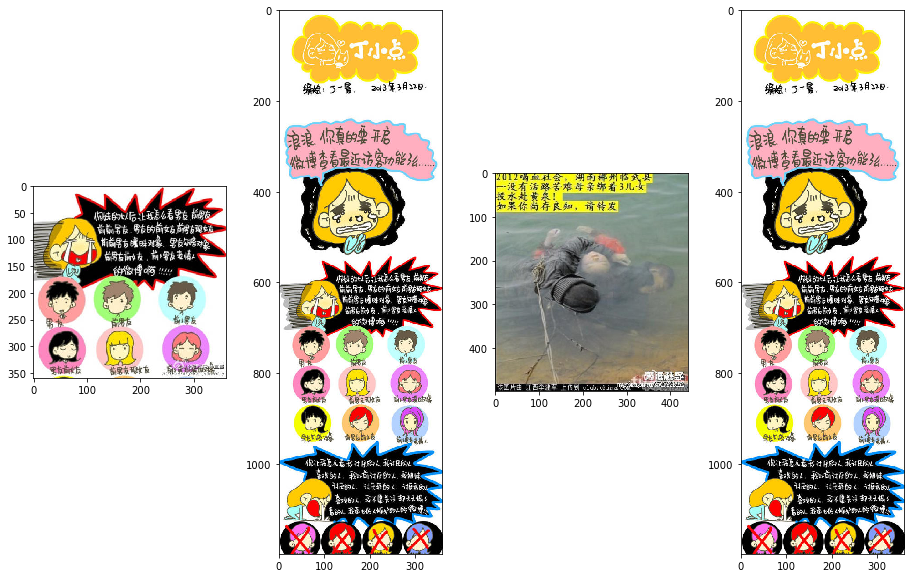

In [120]:
show_images(clusters[0])

[[ 1.00000012  0.75446385  0.47294328  0.59793472  0.59848624]
 [ 0.75446385  0.99999994  0.49952912  0.65838236  0.52405012]
 [ 0.47294328  0.49952912  1.          0.40077507  0.4065733 ]
 [ 0.59793472  0.65838236  0.40077507  1.          0.44674563]
 [ 0.59848624  0.52405012  0.4065733   0.44674563  0.99999982]]


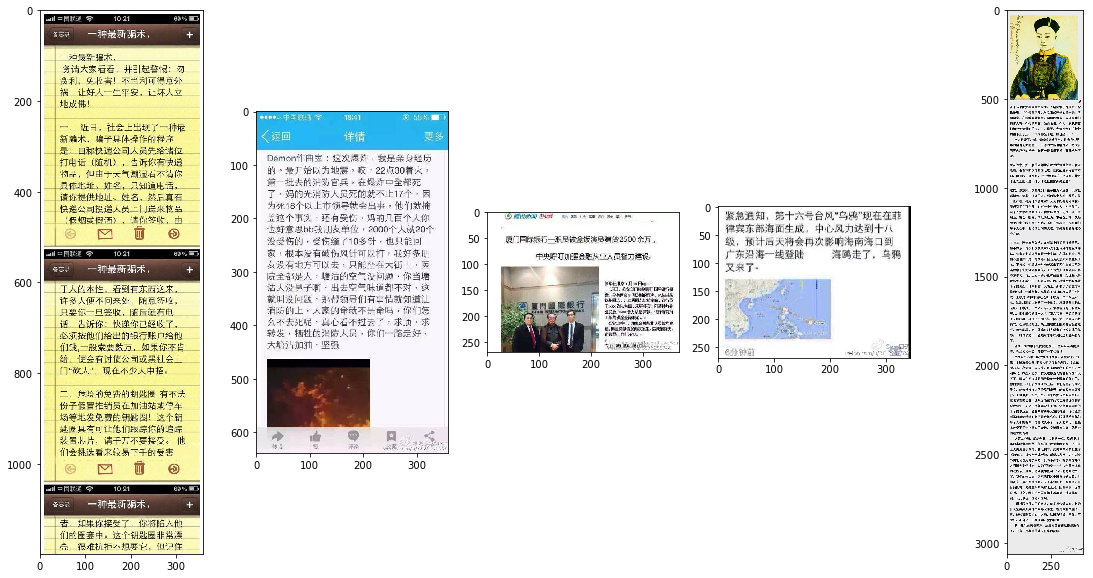

In [121]:
show_images(clusters[2])

[[ 1.00000012  0.52338183  0.56638771  0.50679094  0.44105017]
 [ 0.52338183  1.          0.61207116  0.45886478  0.53712475]
 [ 0.56638771  0.61207116  1.00000012  0.69104683  0.53910613]
 [ 0.50679094  0.45886478  0.69104683  0.99999994  0.50801152]
 [ 0.44105017  0.53712475  0.53910613  0.50801152  1.00000012]]


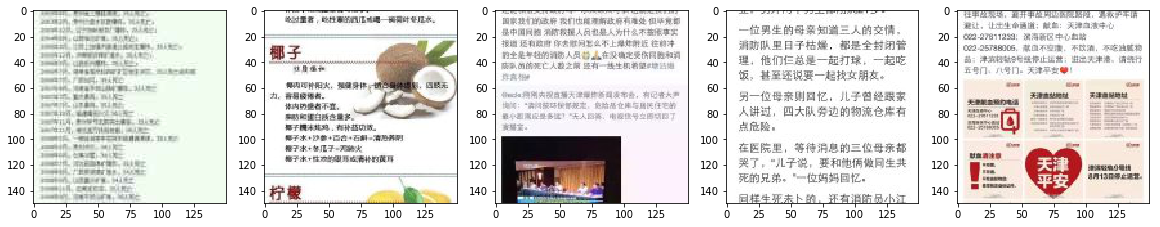

In [122]:
show_images(clusters[3])

[[ 0.99999994  0.56817544  0.54114801  0.58991814  0.61826444]
 [ 0.56817544  1.00000012  0.56693387  0.58296549  0.69668639]
 [ 0.54114801  0.56693387  1.          0.65207392  0.70360309]
 [ 0.58991814  0.58296549  0.65207392  1.00000012  0.61164385]
 [ 0.61826444  0.69668639  0.70360309  0.61164385  1.00000012]]


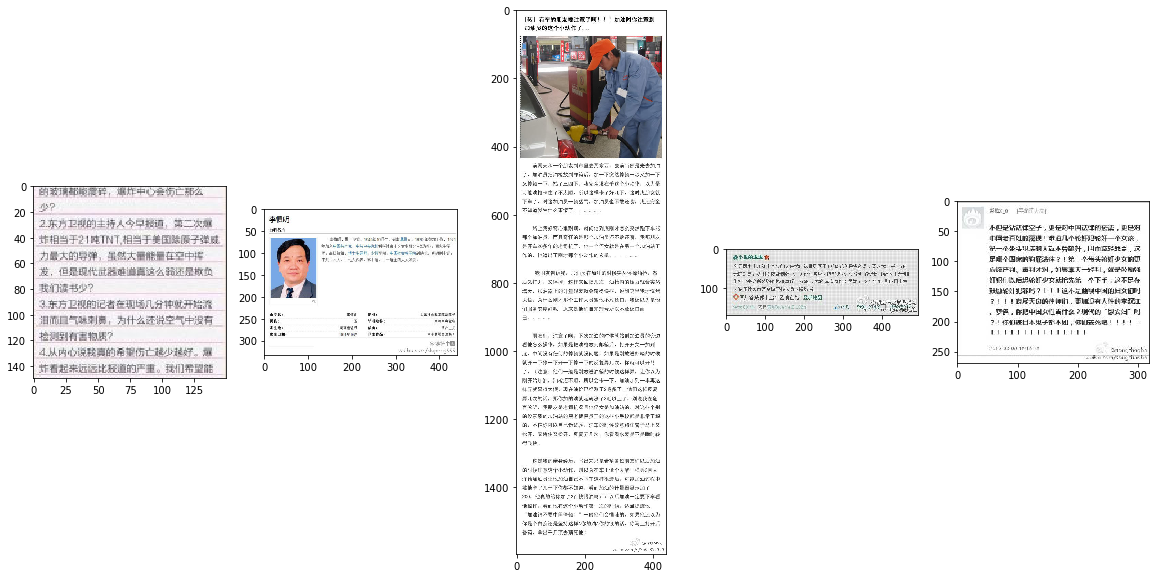

In [123]:
show_images(clusters[4])

## 查看所有图片的相似度

In [137]:
import random
whole_cos = pw.cosine_similarity(im_features)

In [197]:
def show_imgs_in_lim(low, high):
    img_tuple_list = []
    for i in range(random.randint(0, len(image_paths)),im_features.shape[0]):
        for j in range(i+1, im_features.shape[0]):
            if whole_cos[i][j] > low and whole_cos[i][j] < high:
                img_tuple_list.append((image_paths[i], image_paths[j]))
        if len(img_tuple_list) >= 100:
            break
    
    plt.figure(figsize=(20,15))
    for i, img_tuple in enumerate(random.sample(img_tuple_list, 6)):
        plt.subplot(3, 4, i*2 + 1)
        plt.imshow(plt.imread(img_tuple[0]))
        
        plt.subplot(3, 4, i*2 + 2)
        plt.imshow(plt.imread(img_tuple[1]))

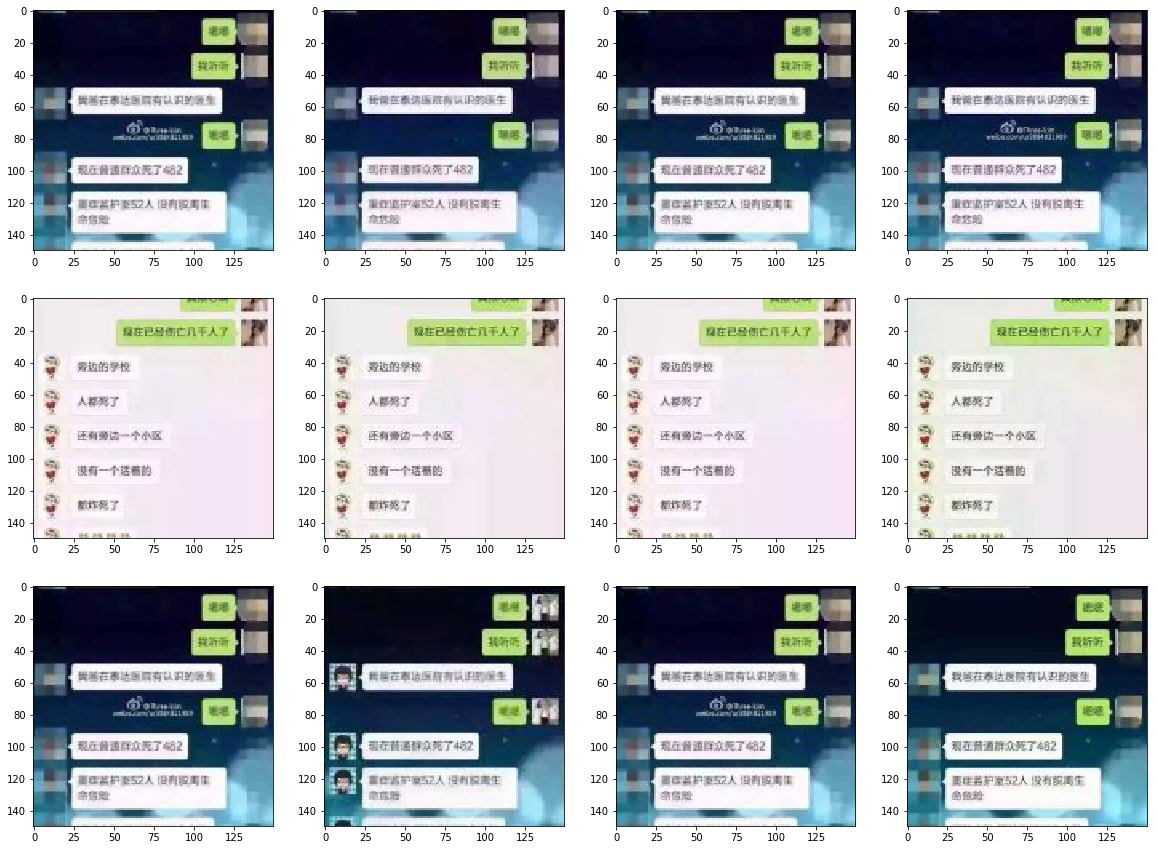

In [206]:
show_imgs_in_lim(0.9, 1)

In [207]:
whole_cos > 0.9

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ..., 
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]], dtype=bool)

In [208]:
sum = 0
for i in range(im_features.shape[0]):
    for j in range(i+1, im_features.shape[0]):
        if whole_cos[i][j] > 0.9:
            sum += 1

In [209]:
sum

6611

In [210]:
whole_cos.shape

(10547, 10547)